<a href="https://colab.research.google.com/github/annisaanfz/CNN/blob/master/CNN_Annisa_Nur_Fauza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
"""
Sinkronisasi Colabs dengan Google Drive
"""

!pip install -U -q PyDrive
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
import pandas as pd
file_list = drive.ListFile(
    {'q': "'1A6IuQnGbMBQ3pZRZOFzn8hdsWq1uack1' in parents"}).GetList()

# Create Dictionary List

for f in file_list:
  # 3. Create & download by id.
  print('title: %s, id: %s' % (f['title'], f['id']))
#   downloaded = drive.CreateFile({'id':f['id']}) 
#   downloaded.GetContentFile(f['title'])  
#   df3 = pd.read_csv(f['title'], header=None)

title: Beats 234.csv, id: 1kZ7zkAc_0v2kJ1yGGcZsgSkVU1Wngyzj
title: Beats 233.csv, id: 1M-s8fx81CkfgrasD57T89qvi2fYsB8mI
title: Beats 232.csv, id: 11dYrm4l1vEwqNQMPb-6VbxGgycI08wmx
title: Beats 231.csv, id: 1CUenRX0iEKp6hAOfqA6vOVmTm6R6AU-W
title: Beats 230.csv, id: 1zQ6Wgrut8RhyeynNiUe0ofD4eo5lDgNu
title: Beats 228.csv, id: 1p0G2rWuSCKIV2jf-mQawU9bRuX0j3w46
title: Beats 223.csv, id: 1ipESho8THh8jeemjMUN3As5yWqt40IPt
title: Beats 222.csv, id: 1eOzCpVGR3XZA8abbXmOOd7QlJp3s1vMM
title: Beats 221.csv, id: 1F0bbzWZQy4ezlrDOV78PBx76NsylDt-X
title: Beats 220.csv, id: 1KroaWk9fdQUZilzjPGRxd1SYdhyqfjwN
title: Beats 219.csv, id: 1_dNrRLjoe8mYY_r7rZh2y9uGjus3kXle
title: Beats 217.csv, id: 16Iq7F00ii58oxPt0ZF_UJhbajCoCI4xa
title: Beats 215.csv, id: 1gnzVUbbaGF-XXTad-Phx3URiBTUqtBNI
title: Beats 214.csv, id: 149E33BZ7Y3mpRDA-lQNUD7GLybX7zi1u
title: Beats 213.csv, id: 1IEIjIqOBcZUa3ltWqUPtKks9v_jlC8WU
title: Beats 212.csv, id: 1w3bIHRH5PwYL8yu-aAsxEtFXzwI4ZAT7
title: Beats 210.csv, id: 1x9uMXzOgwFb81

In [0]:
title = file_list[0]['title']
print(title)
key = title.split(" ")
print(key)
key2 = key[1].split(".")
print(key2)

Beats 234.csv
['Beats', '234.csv']
['234', 'csv']


In [0]:
data = {}
for f in file_list:
  if "Beats" in f['title']:
    title = f['title']
    key = title.split(" ")
    key2 = key[-1].split(".")
    data[key2[0]] = {}
    
for key in data.keys():
  for f in file_list:
    if key in f['title'] and "list_symbol" in f['title']:
      data[key]['list_symbol'] = [f['title'], f['id']]
    elif key in f['title'] and "Beats" in f['title']:
      data[key]['Beats'] = [f['title'], f['id']]
    elif key in f['title'] and "list_atb" in f['title']:
      data[key]['list_atb'] = [f['title'], f['id']]

In [0]:
list_beats = []
list_symbol = []
list_atb = []
import numpy as np
for key in data.keys():
  
  id_beats = data[key]["Beats"][1]
  title_beats = data[key]["Beats"][0]
  downloaded_beats = drive.CreateFile({'id':id_beats}) 
  downloaded_beats.GetContentFile(title_beats)  
  beats = np.genfromtxt(title_beats)
  list_beats.append(beats)
  
  id_atb = data[key]["list_atb"][1]
  title_atb = data[key]["list_atb"][0]
  downloaded_atb = drive.CreateFile({'id':id_atb}) 
  downloaded_atb.GetContentFile(title_atb)  
  atb = np.genfromtxt(title_atb, dtype = np.int32)
  list_atb.append(atb)
  
  id_sym = data[key]["list_symbol"][1]
  title_sym = data[key]["list_symbol"][0]
  downloaded_sym = drive.CreateFile({'id':id_sym}) 
  downloaded_sym.GetContentFile(title_sym)  
  sym = np.genfromtxt(title_sym, dtype = str)
  list_symbol.append(sym)

['+' 'N' 'N' ... 'N' 'N' 'N']
[18, 77, 370, 662, 946]


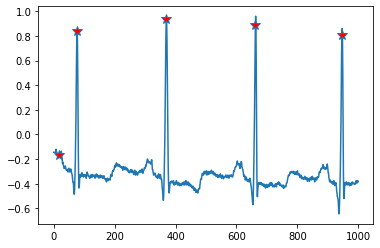

In [0]:
print(list_symbol[0])
list_puncak = np.where(atb <= 1000)[0]
puncak = list(atb[list_puncak])
print(puncak)
from matplotlib import pyplot as plt

plot_signal = np.array(beats[0:1000])
fig = plt.figure()
plt.plot(np.arange(len(plot_signal)),plot_signal, 
         '*', linestyle='-', ms=10, markevery = puncak, 
         markerfacecolor = "red")

In [0]:
print(atb[1])

print(len(list_atb[0]))
print(len(list_beats[0]))
print(len(list_symbol[0]))

77
2764
650000
2764


In [0]:
X =[]
y = []
index = 0
t0 = 90
t1 = 162
for index, value in enumerate(list_atb):
  beat = list_beats[index]
  symbol = list_symbol[index]
  for idx, atb in enumerate(value):
    
    start = atb - t0
    finish = atb + t1
    
    if start >= 0 and finish < 650000:
      
      slice_beat = beat[start:finish]
      X.append(slice_beat)
      y.append(symbol[idx])
      
X = np.array(X)
y = np.array(y)

In [0]:
print(X[0])
print(X[1])
print(X[2])
print(X[3])
print(X[4])

[-0.065 -0.06  -0.055 -0.055 -0.05  -0.05  -0.065 -0.065 -0.06  -0.05
 -0.05  -0.045 -0.045 -0.05  -0.05  -0.05  -0.045 -0.055 -0.05  -0.065
 -0.08  -0.08  -0.065 -0.06  -0.055 -0.05  -0.05  -0.035 -0.02  -0.015
 -0.02  -0.015 -0.01   0.005  0.015  0.025  0.035  0.06   0.075  0.09
  0.115  0.135  0.13   0.125  0.105  0.095  0.105  0.095  0.1    0.105
  0.105  0.085  0.07   0.045  0.01  -0.02  -0.05  -0.07  -0.09  -0.095
 -0.08  -0.08  -0.075 -0.085 -0.09  -0.095 -0.11  -0.12  -0.125 -0.135
 -0.135 -0.14  -0.125 -0.125 -0.115 -0.13  -0.12  -0.125 -0.14  -0.155
 -0.135 -0.07   0.025  0.19   0.395  0.635  0.9    1.18   1.415  1.595
  1.66   1.575  1.37   1.065  0.72   0.38   0.11  -0.09  -0.185 -0.23
 -0.205 -0.165 -0.12  -0.11  -0.125 -0.14  -0.155 -0.17  -0.185 -0.19
 -0.18  -0.175 -0.155 -0.18  -0.18  -0.18  -0.19  -0.205 -0.22  -0.215
 -0.19  -0.17  -0.155 -0.15  -0.15  -0.17  -0.175 -0.165 -0.175 -0.19
 -0.19  -0.185 -0.155 -0.14  -0.13  -0.13  -0.135 -0.135 -0.14  -0.14
 -0.15  -0.1

In [0]:
print(X[112558])
print(X[112559])
print(X[112560])
print(X[112561])
print(X[112562])

[-0.355 -0.35  -0.33  -0.33  -0.34  -0.35  -0.36  -0.345 -0.33  -0.34
 -0.345 -0.345 -0.355 -0.32  -0.31  -0.305 -0.31  -0.305 -0.3   -0.27
 -0.25  -0.25  -0.245 -0.235 -0.24  -0.215 -0.21  -0.195 -0.2   -0.21
 -0.205 -0.21  -0.215 -0.225 -0.235 -0.225 -0.23  -0.215 -0.21  -0.195
 -0.195 -0.17  -0.155 -0.135 -0.13  -0.15  -0.195 -0.235 -0.26  -0.245
 -0.25  -0.27  -0.29  -0.31  -0.32  -0.335 -0.335 -0.33  -0.335 -0.345
 -0.35  -0.36  -0.355 -0.355 -0.365 -0.38  -0.375 -0.37  -0.36  -0.355
 -0.365 -0.365 -0.375 -0.35  -0.36  -0.38  -0.415 -0.47  -0.485 -0.49
 -0.53  -0.56  -0.535 -0.42  -0.265 -0.08   0.12   0.405  0.715  0.925
  1.     0.965  0.695  0.23  -0.235 -0.515 -0.555 -0.46  -0.385 -0.365
 -0.37  -0.375 -0.39  -0.37  -0.355 -0.36  -0.375 -0.395 -0.395 -0.385
 -0.37  -0.365 -0.375 -0.385 -0.39  -0.385 -0.385 -0.385 -0.385 -0.385
 -0.4   -0.395 -0.385 -0.37  -0.375 -0.385 -0.39  -0.365 -0.365 -0.365
 -0.365 -0.375 -0.375 -0.36  -0.365 -0.365 -0.355 -0.365 -0.375 -0.375
 -0.365 -0

In [0]:
print(len(y))

112563


In [0]:
print(y[112558])
print(y[112559])
print(y[112560])
print(y[112561])
print(y[112562])

N
N
N
N
N


In [0]:
print(y[0])
print(y[1])
print(y[2])
print(y[3])
print(y[4])

N
N
N
N
N


In [0]:
type(y)
X.shape

(112563, 252)

In [0]:
print(y)
list_z = np.where(y == '[')[0]
print(X)
print(list_z)
y = np.delete(y, list_z)
X = np.delete(X, list_z, 0)
print(y)
print(X)
print(len(y))
print(len(X))

list_z = np.where(y == '!')[0]
print(list_z)
y = np.delete(y, list_z)
X = np.delete(X, list_z, 0)
print(y)
print(X)
print(len(y))
print(len(X))

list_z = np.where(y == ']')[0]
print(list_z)
y = np.delete(y, list_z)
X = np.delete(X, list_z, 0)
print(y)
print(X)
print(len(y))
print(len(X))

list_z = np.where(y == 'x')[0]
print(list_z)
y = np.delete(y, list_z)
X = np.delete(X, list_z, 0)
print(y)
print(X)
print(len(y))
print(len(X))

list_z = np.where(y == '|')[0]
print(list_z)
y = np.delete(y, list_z)
X = np.delete(X, list_z, 0)
print(y)
print(X)
print(len(y))
print(len(X))

list_z = np.where(y == '"')[0]
print(list_z)
y = np.delete(y, list_z)
X = np.delete(X, list_z, 0)
print(y)
print(X)
print(len(y))
print(len(X))

list_z = np.where(y == '+')[0]
print(list_z)
y = np.delete(y, list_z)
X = np.delete(X, list_z, 0)
print(y)
print(X)
print(len(y))
print(len(X))

list_z = np.where(y == '~')[0]
print(list_z)
y = np.delete(y, list_z)
X = np.delete(X, list_z, 0)
print(y)
print(X)
print(len(y))
print(len(X))

['N' 'N' 'N' ... 'N' 'N' 'N']
[[-0.065 -0.06  -0.055 ...  0.035  0.045  0.05 ]
 [ 0.055  0.055  0.06  ...  0.04   0.035  0.035]
 [ 0.02   0.03   0.03  ... -0.045 -0.055 -0.04 ]
 ...
 [-0.285 -0.275 -0.28  ... -0.3   -0.305 -0.305]
 [-0.305 -0.3   -0.305 ... -0.335 -0.345 -0.345]
 [-0.345 -0.345 -0.335 ... -0.425 -0.45  -0.475]]
[49290 49325 49543 49560 49612 51068]
['N' 'N' 'N' ... 'N' 'N' 'N']
[[-0.065 -0.06  -0.055 ...  0.035  0.045  0.05 ]
 [ 0.055  0.055  0.06  ...  0.04   0.035  0.035]
 [ 0.02   0.03   0.03  ... -0.045 -0.055 -0.04 ]
 ...
 [-0.285 -0.275 -0.28  ... -0.3   -0.305 -0.305]
 [-0.305 -0.3   -0.305 ... -0.335 -0.345 -0.345]
 [-0.345 -0.345 -0.335 ... -0.425 -0.45  -0.475]]
112557
112557
[49291 49292 49293 49294 49295 49296 49297 49298 49299 49300 49301 49302
 49303 49304 49305 49306 49307 49308 49309 49310 49311 49312 49313 49314
 49315 49316 49317 49318 49325 49326 49327 49328 49329 49330 49331 49332
 49333 49334 49335 49336 49337 49338 49339 49340 49542 49543 49544 49

In [0]:
list_q = np.where((y != 'N') & (y != 'L') & (y != 'R') & (y != 'e') & (y != 'j')[0])
print(list_q[0])
y[list_q] = 'Tidak Normal'
list_q = np.where((y == 'N') & (y == 'L')& (y == 'R')& (y == 'e')& (y == 'j')[0])
print(list_q[0])
y[list_q] = 'Normal'
print(y)
print(len(y))

[  1297   1298   1299 ... 109198 109247 109376]
[]
['N' 'N' 'N' ... 'N' 'N' 'N']
109452


In [0]:
from sklearn import preprocessing

lab_encode = preprocessing.LabelEncoder()
model_encode = lab_encode.fit(y)
y_transform = model_encode.transform(y)

print(len(y))
print(len(X))
print(y_transform)

109452
109452
[1 1 1 ... 1 1 1]


In [0]:
print(y_transform)

[1 1 1 ... 1 1 1]


In [0]:
from keras.utils import to_categorical
y_one_hot = to_categorical(y_transform)

Using TensorFlow backend.


In [0]:
print(y_one_hot[0])

[0. 1. 0. 0. 0.]


In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size = 0.33, random_state = 42)

In [0]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense,Activation,Flatten,Dropout
import numpy as np
from keras.layers.convolutional import Convolution1D
from keras.constraints import maxnorm
from keras.optimizers import adam
from keras import backend as K

X_train = np.array(X_train).reshape(-1,1,252)

model_cnn = Sequential()
model_cnn.add(Convolution1D(16,5,input_shape=(1,252),activation='relu',border_mode='same' ,W_constraint=maxnorm(3)))
model_cnn.add(Convolution1D(32,5,input_shape=(1,252),activation='relu',border_mode='same' ,W_constraint=maxnorm(3)))
model_cnn.add(Convolution1D(64,5,input_shape=(1,252),activation='relu',border_mode='same' ,W_constraint=maxnorm(3)))

model_cnn.add(Flatten())
# model.add(Dense(2048,activation='sigmoid',W_constraint=maxnorm(3)))
model_cnn.add(Dense(96,activation='relu',W_constraint=maxnorm(3)))
model_cnn.add(Dropout(.4))
model_cnn.add(Dense(len(y_train[0]),activation='softmax'))

model_cnn.compile(optimizer=adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

model_cnn.fit(X_train,y_train, epochs=5)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(16, 5, input_shape=(1, 252), activation="relu", padding="same", kernel_constraint=<keras.con...)`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(32, 5, input_shape=(1, 252), activation="relu", padding="same", kernel_constraint=<keras.con...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(64, 5, input_shape=(1, 252), activation="relu", padding="same", kernel_constraint=<keras.con...)`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(96, activation="relu", kernel_constraint=<keras.con...)`


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/5





73332/73332 [==============================] - 11s 149us/step - loss: 0.2809 - acc: 0.9139
Epoch 2/5
73332/73332 [==============================] - 10s 133us/step - loss: 0.1386 - acc: 0.9622
Epoch 3/5
73332/73332 [==============================] - 9s 129us/step - loss: 0.1139 - acc: 0.9679
Epoch 4/5
73332/73332 [==============================] - 9s 128us/step - loss: 0.0978 - acc: 0.9727
Epoch 5/5
73332/73332 [==============================] - 9s 127us/step - loss: 0.0888 - acc: 0.9751


In [0]:
model_cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 1, 16)             20176     
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 1, 32)             2592      
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 1, 64)             10304     
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 96)                6240      
_________________________________________________________________
dropout_1 (Dropout)          (None, 96)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 194       
Total para

In [0]:
X_test = np.array(X_test).reshape(-1, 1, 252)
score_testing = model_cnn.evaluate(X_test, y_test)

36120/36120 [==============================] - 1s 35us/step


In [0]:
y_pred = model_cnn.predict_classes(X_test)
print(y_pred)

[0 0 1 ... 0 1 0]


In [0]:
type(y_test)

numpy.ndarray

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test.argmax(axis=1), y_pred)
print(cm)

[[24638   122]
 [  550 10810]]


In [0]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test.argmax(axis=1), y_pred)
print(acc)

0.9813953488372092


In [0]:
from sklearn.metrics import precision_score
pcc = precision_score(y_test.argmax(axis=1), y_pred)
print(pcc)

0.9888401024515184


In [0]:
from sklearn.metrics import classification_report
classification_report(y_test.argmax(axis=1), y_pred)

'              precision    recall  f1-score   support\n\n           0       0.98      1.00      0.99     24760\n           1       0.99      0.95      0.97     11360\n\n   micro avg       0.98      0.98      0.98     36120\n   macro avg       0.98      0.97      0.98     36120\nweighted avg       0.98      0.98      0.98     36120\n'

In [0]:
from sklearn.utils.multiclass import unique_labels
names = unique_labels(y)
print(names)

['N' 'T']


Confusion matrix, without normalization
[[24638   122]
 [  550 10810]]
Normalized confusion matrix
[[1.   0.  ]
 [0.05 0.95]]


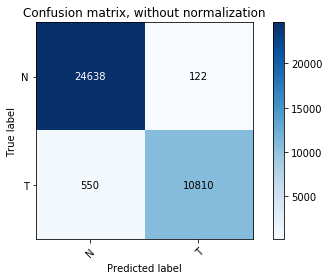

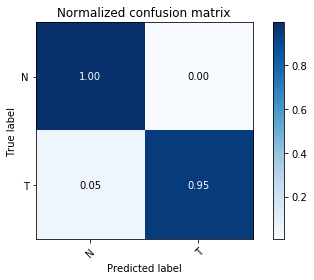

In [0]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test.argmax(axis=1), y_pred, classes=names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test.argmax(axis=1), y_pred, classes=names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()